<a href="https://colab.research.google.com/github/SeidaAhmed/Fitness-Analytics-through-Data-Mining-Leveraging-Wearable-Device-Data-/blob/main/CIND840_Advanced_Dataanalytics_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [3]:
%cd drive/My Drive/

/content/drive/My Drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

df = pd.read_csv('gym_members_exercise_tracking.csv')
# Display first few rows
df.head()



,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [6]:
# Check data types and missing values
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [7]:


# Summary statistics
print(df.describe())

              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000 

In [8]:
# Standardize categorical values
df['Gender'] = df['Gender'].str.lower().str.strip()
df['Workout_Type'] = df['Workout_Type'].str.capitalize().str.strip()

# Check unique values
print(df['Gender'].unique())
print(df['Workout_Type'].unique())

['male' 'female']
['Yoga' 'Hiit' 'Cardio' 'Strength']


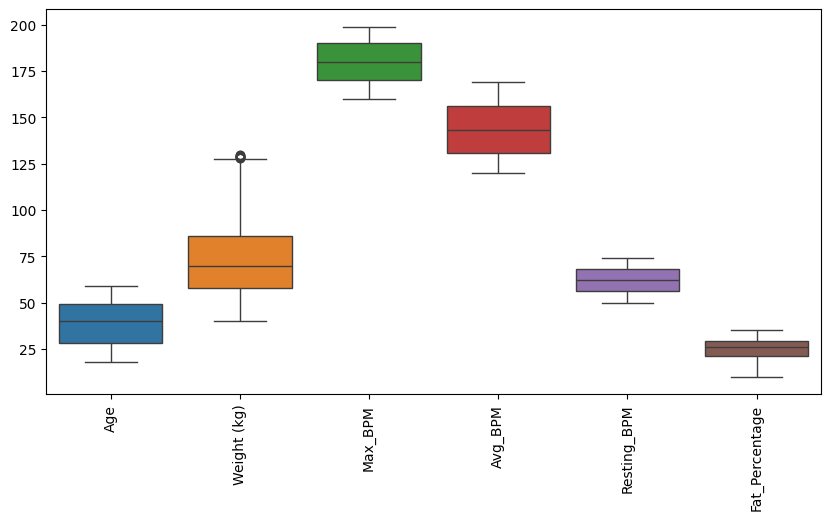

In [9]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Weight (kg)', 'Max_BPM', 'Avg_BPM',
                     'Resting_BPM',
                     'Fat_Percentage']])
plt.xticks(rotation=90)
plt.show()




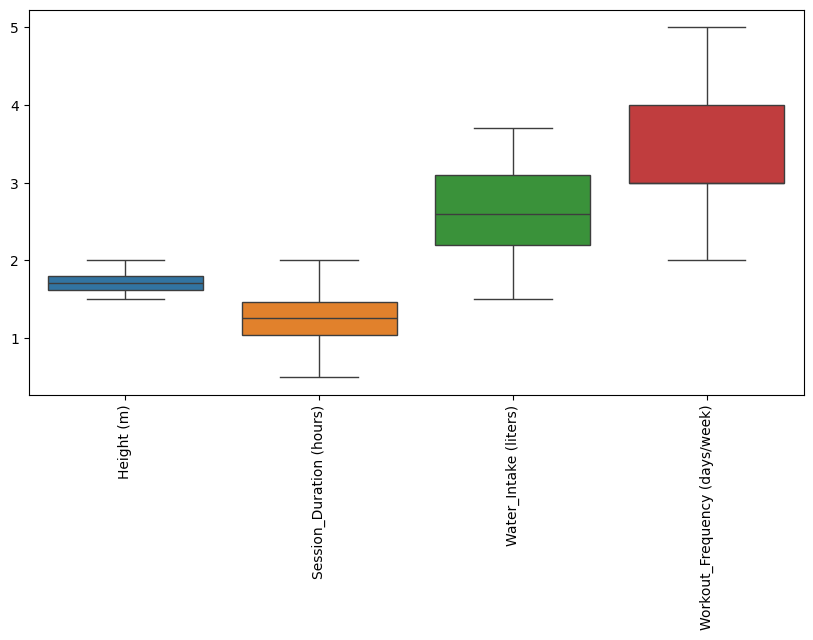

In [10]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Height (m)',
                      'Session_Duration (hours)',
                     'Water_Intake (liters)', 'Workout_Frequency (days/week)']])
plt.xticks(rotation=90)
plt.show()


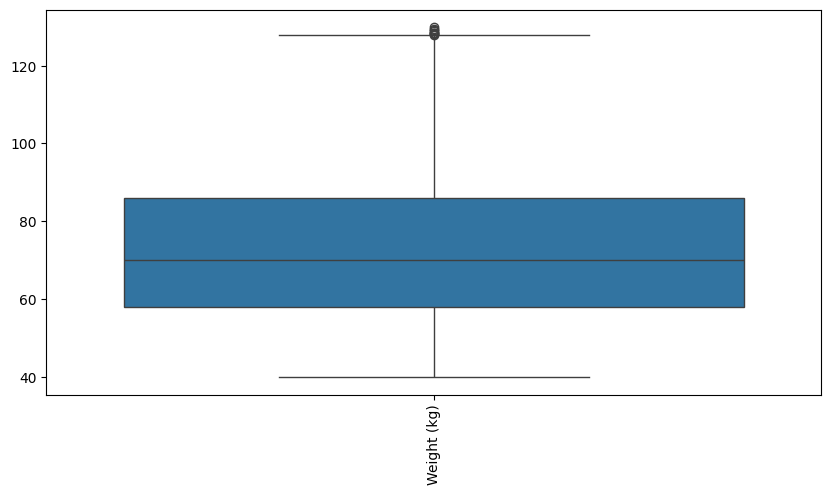

In [11]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Weight (kg)']])
plt.xticks(rotation=90)
plt.show()

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['']])
plt.xticks(rotation=90)
plt.show()

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"

<Figure size 1000x500 with 0 Axes>

In [13]:
# Remove outliers using IQR method
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [14]:
# Convert categorical variables
df['Gender'] = df['Gender'].astype('category')
df['Workout_Type'] = df['Workout_Type'].astype('category')
df['Experience_Level'] = df['Experience_Level'].astype('category')

# Convert duration to float if necessary
df['Session_Duration (hours)'] = df['Session_Duration (hours)'].astype(float)


In [15]:
# Categorize Age Groups
df['Age Group'] = pd.cut(df['Age'], bins=[10, 18, 30, 45, 60, 100],
                         labels=['Teen', 'Young Adult', 'Adult', 'Middle-aged', 'Senior'])


In [16]:
 #General statistics
print(df.describe(include='all'))

               Age Gender  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count   973.000000    973   973.000000   973.00000  973.000000  973.000000   
unique         NaN      2          NaN         NaN         NaN         NaN   
top            NaN   male          NaN         NaN         NaN         NaN   
freq           NaN    511          NaN         NaN         NaN         NaN   
mean     38.683453    NaN    73.854676     1.72258  179.883864  143.766701   
std      12.180928    NaN    21.207500     0.12772   11.525686   14.345101   
min      18.000000    NaN    40.000000     1.50000  160.000000  120.000000   
25%      28.000000    NaN    58.100000     1.62000  170.000000  131.000000   
50%      40.000000    NaN    70.000000     1.71000  180.000000  143.000000   
75%      49.000000    NaN    86.000000     1.80000  190.000000  156.000000   
max      59.000000    NaN   129.900000     2.00000  199.000000  169.000000   

        Resting_BPM  Session_Duration (hours)  Calories_Burned 

In [26]:
# Grouped statistics
print(df.groupby('Gender')['Calories_Burned'].mean())

Gender
female    862.248918
male      944.455969
Name: Calories_Burned, dtype: float64


<ipython-input-26-ea8cd5a7544b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Gender')['Calories_Burned'].mean())


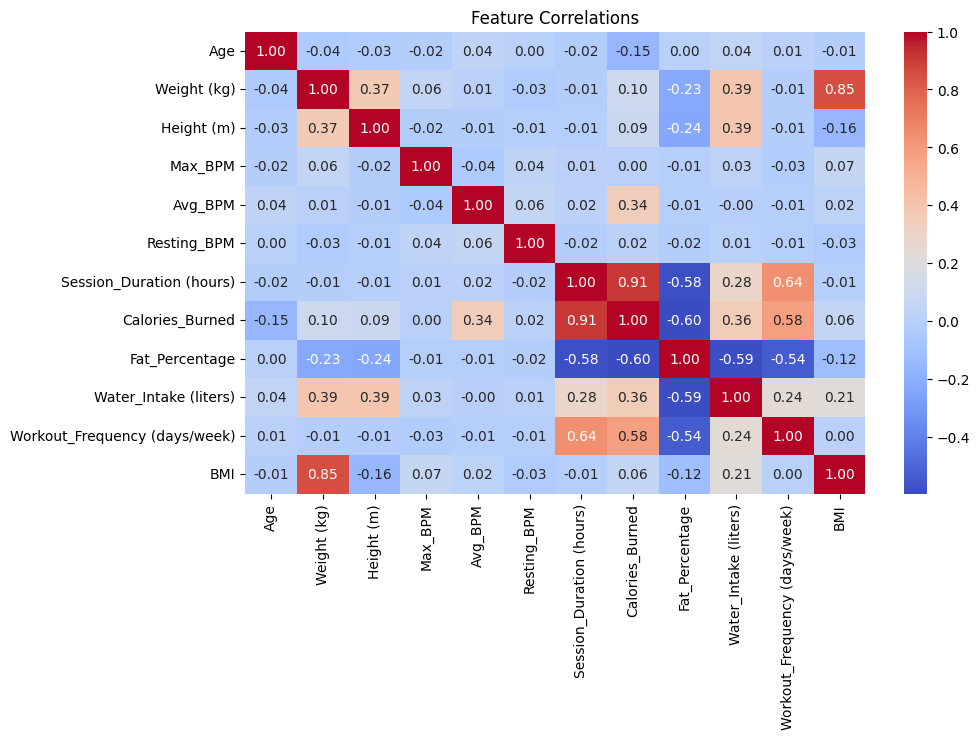

In [18]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations")
plt.show()

In [ ]:
df.to_csv("cleaned_gym_dataset.csv", index=False)

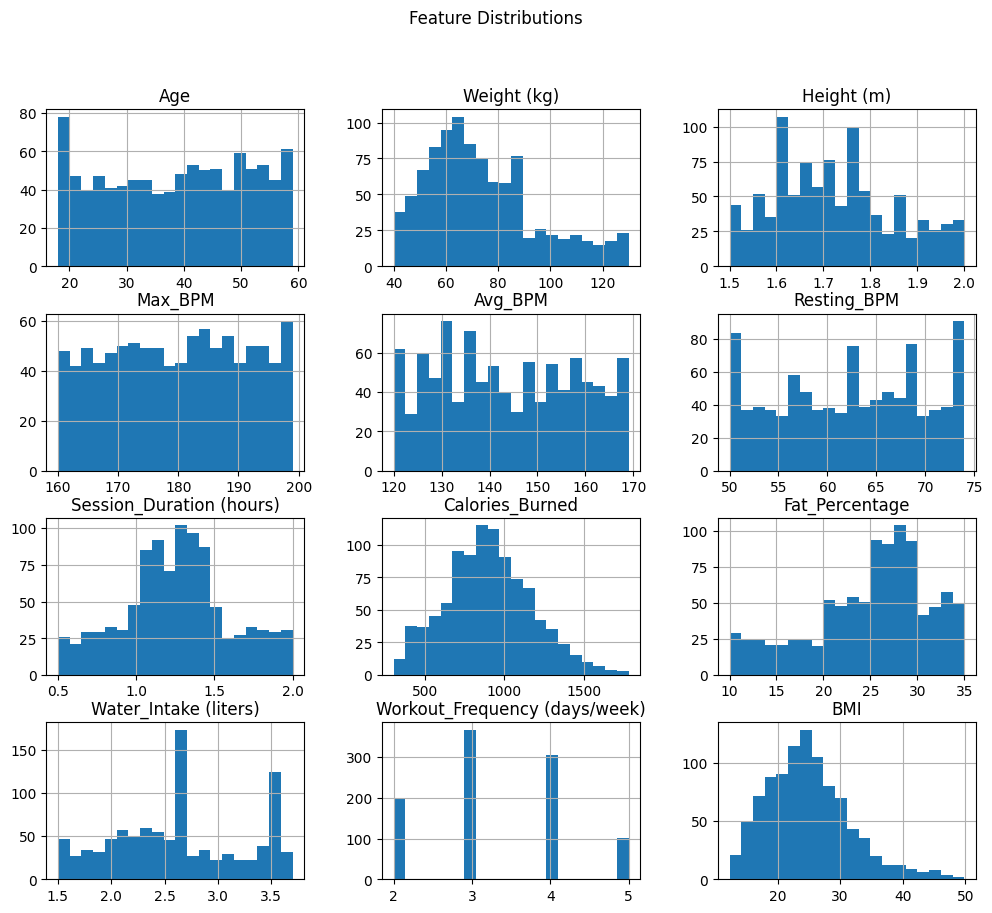

In [19]:
# Data distribution of numerical features
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

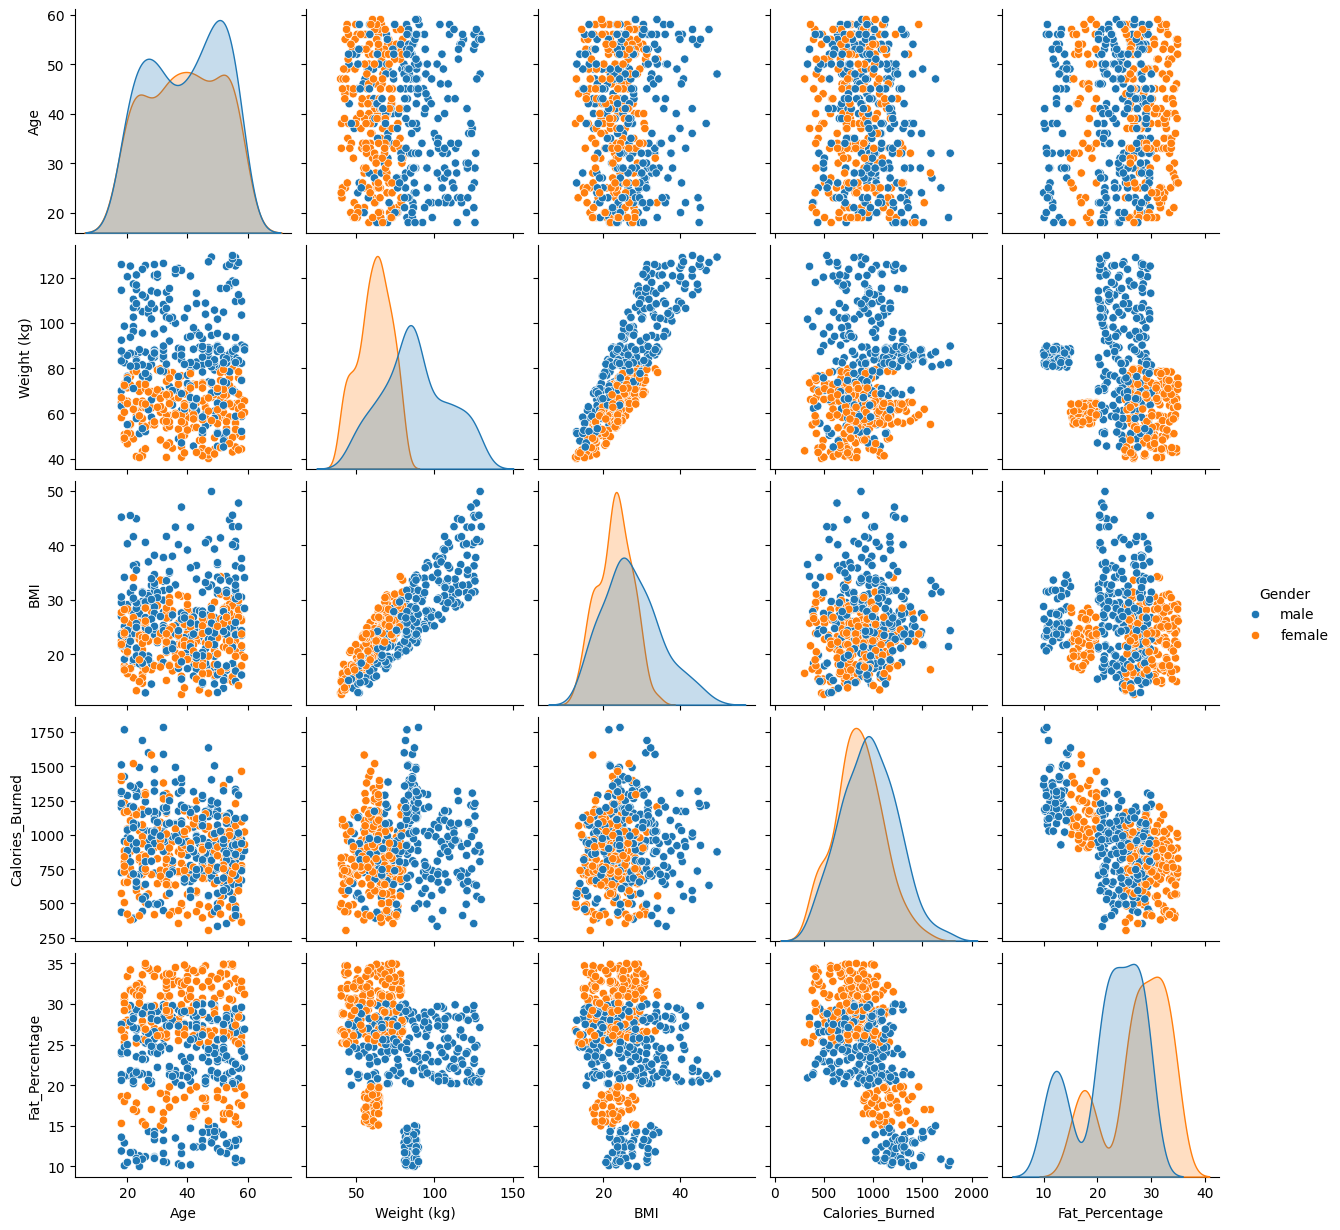

In [39]:
# Ensure Gender is a string for proper categorical encoding
df['Gender'] = df['Gender'].astype(str)

# Handle missing values for pairplot
df_subset = df[['Age', 'Weight (kg)', 'BMI', 'Calories_Burned', 'Fat_Percentage', 'Gender']].dropna()

# Pairplot for relationships (sampling for efficiency)
sns.pairplot(df_subset.sample(min(500, len(df_subset)), random_state=42), hue='Gender')
plt.show()




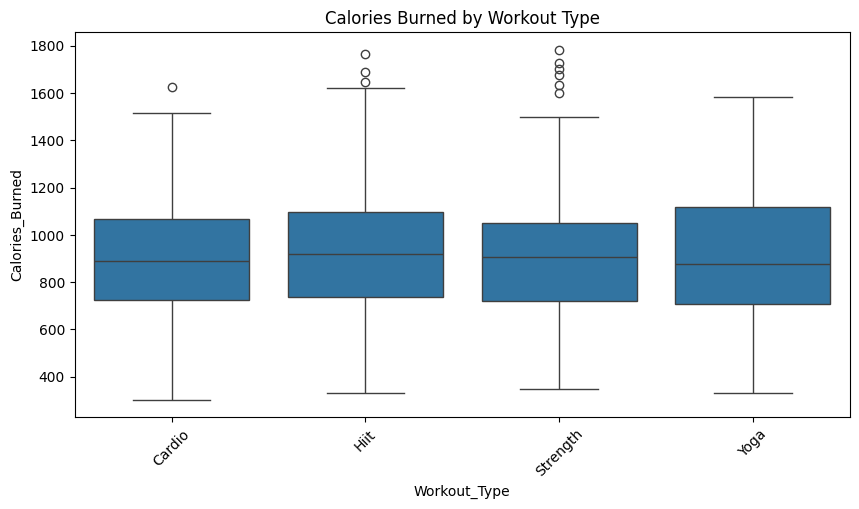

In [32]:
# Analyzing impact of workout type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.xticks(rotation=45)
plt.title("Calories Burned by Workout Type")
plt.show()


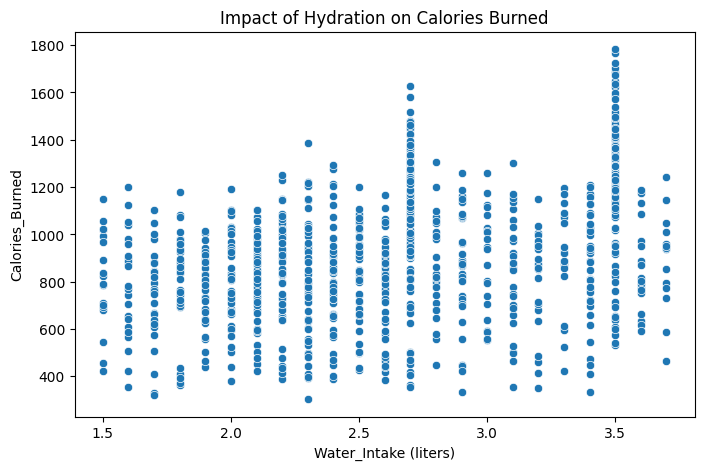

In [34]:
# Analyzing impact of hydration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Water_Intake (liters)', y='Calories_Burned', data=df)
plt.title("Impact of Hydration on Calories Burned")
plt.show()

In [ ]:
# Machine Learning Model to Predict Calories Burned
features = ['Age', 'Weight(kg)', 'BMI', 'Max_BPM', 'Avg_BPM', 'Resting_BPM']
target = 'Calories Burned'

df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Support Vector Machine Model
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# Model Evaluation
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("\n")

evaluate_model(y_test, dt_preds, "Decision Tree")
evaluate_model(y_test, svm_preds, "SVM")